# CS 135 day02: Basics of Regression Methods

# Objectives

* Practice loading data from CSV files and manipulating that data with Pandas and NumPy
* Try out sklearn's linear regression on a dataset with 1-dim. features and many features
* Try out sklearn's k-nearest neighbor regression on a dataset with 1-dim. features and many features
* Try out comparing models using mean squared error as a performance metric

# What to do

Download the *abalone* dataset from our course starter-code repo here:

* Dataset CSV files: https://github.com/tufts-ml-courses/cs135-26s-assignments/tree/main/labs/data_abalone
* Dataset README: https://github.com/tufts-ml-courses/cs135-26s-assignments/tree/main/labs/data_abalone/README.md

In class (or later at home), work your way through this notebook. 

Each "part" has a structure like this:

* First, some prefilled content so you can learn how to do basic ML operations with sklearn.
* Second, some simple exercises to try to figure things out yourself


# Outline

* [Part 1: Linear Regression with 1-dim. features](#part1)
* * Real Task: Regression of 'rings' given 'length' using abalone dataset
* * Exercise 1a: Reproduce the `predict` method
* [Part 2: Linear Regression with 3-dim. features](#part2)
* * Real Task: Regression of 'rings' given 'length', 'height', 'weight'
* * Exercise 2a: Reproduce the `predict` method
* * Exercise 2b: Compare mean squared error on training set with model from part 1
* [Part 3: K-nearest neighbor regression](#part3)
* * Real Task: Regression of 'rings' given 'length'
* * Exercise 3a: How does training set error vary with number of neighbors?
* * Exercise 3b: Repeat using all available features (not just length)
* * Exercise 3c: Reproduce the `predict` method for k-NN


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import sklearn

In [3]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

In [4]:
os.getcwd()

'/home/cmagnano/tufts/cs135/s26/cs135-26s-staffonly/labs_src'

In [5]:
# If running in cloud on Google colab, be sure to acquire the required dataset
if os.getenv("COLAB_RELEASE_TAG") and not os.path.exists('data_abalone'):
    !git clone https://github.com/tufts-ml-courses/cs135-26s-assignments.git
    os.chdir(os.path.join('cs135-26s-assignments', 'labs'))
    
if not os.path.exists('data_abalone'):
    raise ValueError("Need to run this script within a valid checkout of the cs135 repo")

<a id="part1"></a>

# Part 1: Simple Linear Regression with 1-dim. features



### Goal: Predict 'rings' outcome given 'length' of abalone

We'll do this in a few easy steps below:

1) Load in 'x' training data, the 'length' of each abalone

2) Load in 'y' training data, the 'rings' count of each abalone

3) Train a linear regression model by calling 'fit'

4) Make predictions using this model by calling 'predict'

### Step 1: Load in 'x', the inputs for our regression task

In [7]:
# Show the first 5 lines of this CSV:

with open('data_abalone/x_train.csv', 'r') as f:
    for line in f.readlines()[:5]:
        print(line.strip())

is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
0.0,0.43,0.325,0.09,0.425,0.217,0.087,0.095
0.0,0.575,0.445,0.135,0.883,0.381,0.2035,0.26
0.0,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275
0.0,0.48,0.35,0.1,0.519,0.2365,0.1275,0.126


In [8]:
# Load in the data into a Panda's dataframe called 'x_df'
x_df = pd.read_csv('data_abalone/x_train.csv')

In [9]:
# Show first 3 rows
x_df.head(3)

,is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
0,0.0,0.430,0.325,0.090,0.4250,0.2170,0.0870,0.095
1,0.0,0.575,0.445,0.135,0.8830,0.3810,0.2035,0.260
2,0.0,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275


In [10]:
# Print summary stats
x_df.describe()

,is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
count,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000
mean,0.360516,0.523352,0.407434,0.139406,0.824952,0.358798,0.179893,0.237566
std,0.480226,0.119343,0.098652,0.042651,0.487228,0.221327,0.109260,0.138865
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.450000,0.350000,0.115000,0.442875,0.186500,0.093000,0.130000
50%,0.000000,0.545000,0.425000,0.140000,0.800250,0.335500,0.170000,0.229500
75%,1.000000,0.615000,0.480000,0.165000,1.146625,0.498500,0.248500,0.326125
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [11]:
# Show how to access column names
for col in x_df.columns:
    print(col)

is_male
length_mm
diam_mm
height_mm
whole_weight_g
shucked_weight_g
viscera_weight_g
shell_weight_g


In [12]:
# Convert from pandas DataFrame to a numpy array with N rows and F columns
x_NF = x_df.values.copy()

print(type(x_NF))

<class 'numpy.ndarray'>


In [13]:
print(x_NF.shape)

(3176, 8)


In [14]:
print(x_NF.dtype)

float64


In [15]:
# Convert only the 'length' column into a numpy array

xlength_N1 = x_df.loc[:, ['length_mm']].values.copy()

print(xlength_N1.shape)

(3176, 1)


OK, now we've got our input! Time for step 2....

### Step 2: Load in 'y', the output of our regression task

In [16]:
y_df = pd.read_csv('data_abalone/y_train.csv')

In [17]:
# Show first 6 rows
y_df.head(6)

,rings
0,7
1,11
2,12
3,7
4,11
5,4


In [18]:
# Print summary stats
y_df.describe()

,rings
count,3176.000000
mean,9.902393
std,3.205887
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [19]:
y_N1 = y_df.loc[:, ['rings']].values.copy()

In [20]:
y_N1.shape

(3176, 1)

### Step 3: Fit a linear regression model, using sklearn

In [21]:
import sklearn.linear_model

In [22]:
# Construct the regression "object"
# The variable 'lin_regr' here is an "instance" of the LinearRegression class

lin_regr = sklearn.linear_model.LinearRegression()

See the documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression>


Any constructed regressor in sklearn (like 'lin_regr') has two useful methods:
* 'fit' method
* 'predict' method (only works after 'fit' is called)

The 'fit' method will *TRAIN* the model

Practically, this method call will 

1) Estimate weight coefficients $w$ and bias/intercept $b$ to minimize mean squared error

2) Updates internal state of the object with these estimated values.

For linear regression specifically:

* an attribute called `coef_` holds the weights
* an attribute called `intercept_` holds the intercept value

In [23]:
lin_regr.fit(xlength_N1, y_N1);

What changed after calling fit?

The *internal state* of the object was updated.

We can see the *internal state* via the "coef" attribute (the *slope* parameter) and the "intercept" attribute (aka *bias* parameter)

In [24]:
lin_regr.coef_

array([[14.77184885]])

In [25]:
lin_regr.intercept_

array([2.17152073])

How would you know what an object can do??

Pro tip: in an active Jupyter notebook, you can use *tab completion* to interactively inspect an object

Just type "lin_regr." and then press the <tab> key.
    
You should see a pop up menu that let's you see what methods and attributes are accessible, like this:
    
![Image of tab completion](https://www.cs.tufts.edu/comp/135/2020f/images/day02_jupyter_object_inspect_on_tab.png)

In [26]:
# Try it here, add "." plus <tab>
lin_regr

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Step 4: Make predictions using this trained linear regression model

In [27]:
# Prepare to evaluate predictions at several possible length values:
G = 7
x_grid_G = np.asarray([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
print(x_grid_G)

[0.   0.25 0.5  0.75 1.   1.25 1.5 ]


In [28]:
# Turn this into a G x 1 2-dim array, since sklearn *always* expects feature input to be 2-dim
x_grid_G1 = x_grid_G[:,np.newaxis]

Now, we call `predict`, which, when given 2-dim array with shape (G,F) of features, will return a 2-dim array of size (G, 1) of *predicted values*

In [29]:
yhat_lin_G1 = lin_regr.predict(x_grid_G1)
print(yhat_lin_G1)
print(yhat_lin_G1.shape)

[[ 2.17152073]
 [ 5.86448295]
 [ 9.55744516]
 [13.25040737]
 [16.94336959]
 [20.6363318 ]
 [24.32929401]]
(7, 1)


### Step 5: Plot the *predicted* values side by side with the observed training data

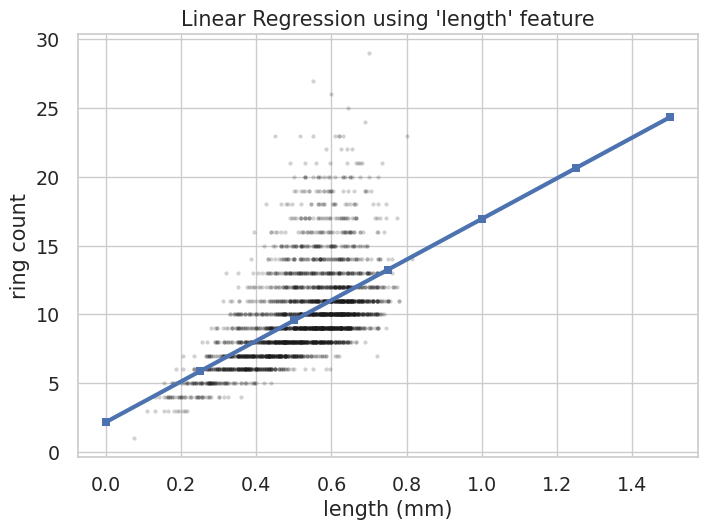

In [30]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_lin_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title("Linear Regression using 'length' feature");

### Step 6: Calculate the mean squared error on the observed training data
 

In [31]:
yhat_train_N1 = lin_regr.predict(xlength_N1)
sklearn.metrics.mean_squared_error(y_N1, yhat_train_N1)

7.167580293483765

# Part 2: Linear Regression with multiple features

### Goal: Predict 'rings' outcome given 'length', 'height', and 'weight' of abalone

How would we do if we wanted to predict 'rings' given not just length, but also height and weight?

### Prepare the data

We now want our features array to have shape: (n_examples, 3)

Since 3 would let us use length and height and weight

In [ ]:
for col in x_df.columns:
    print(col)

is_male
length_mm
diam_mm
height_mm
whole_weight_g
shucked_weight_g
viscera_weight_g
shell_weight_g


In [ ]:
# Grab relevant columns only, convert to a numeric array
x_N3 = x_df.loc[:, ['length_mm', 'height_mm', 'whole_weight_g']].values.copy()
print(type(x_N3))
print(x_N3.dtype)
print(x_N3.shape)

<class 'numpy.ndarray'>
float64
(3176, 3)


#### Construct the model as an sklearn regressor object

In [ ]:
lin_regr_3dim = sklearn.linear_model.LinearRegression()

#### Fit the model

In [ ]:
lin_regr_3dim.fit(x_N3, y_N1)

LinearRegression()

In [ ]:
# TODO: what are the learned weights?

In [ ]:
# TODO: what is the learned intercept?

# Group Activity: Feature Selection

With the person (or people) next to you, try to find the combination of 3 features that gives the best performance. Later we'll learn why this is not the best way to perform feature selection, but for now we'll consider one set of features as being better if it achieves lower mean squared error on the training data. 

Have you and your partner (or partners) each choose a different strategy for trying to find the best combination:

1. First find the best 1-feature model, then "lock-in" that feature and look for the second feature that best complements that first feature, then lock in 2 features and look for a third. 
2. Exhaustively trying all possible combinations of 3 features. 
3. Calculate the correlation between each feature and $y$ using `sklearn.feature_selection.r_regression` and choose the 3 most correlated features.
4. Vibe it out
5. Another strategy you think of.

Now with your group, consider the following questions:

1. Which strategy found the best performance? How much better was it than the other method(s)?
2. What is the worst-case time complexity (Big-O) of each strategy you tried, given in terms of the number of instances N and the number of features F?
3. Which strategy would you choose if you had 100 features? What about 1 million? 

<a id="part3"></a>

# Part 3: K-nearest Neighbor Regression with 1-dim features

### Goal: Try out sklearn's built-in nearest neighbor regressor



In [ ]:
import sklearn.neighbors

In [ ]:
k1nn_regr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Fit the model
k1nn_regr.fit(xlength_N1, y_N1);

In [ ]:
# Prepare to evaluate predictions at several possible length values:
G = 21
x_grid_G = np.linspace(0, 1.5, G)
print(x_grid_G)

[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5  ]


In [ ]:
x_grid_G1 = np.reshape(x_grid_G, (G, 1))

In [ ]:
# Make predictions on the same grid of x input values
yhat_k1nn_G1 = k1nn_regr.predict(x_grid_G1)

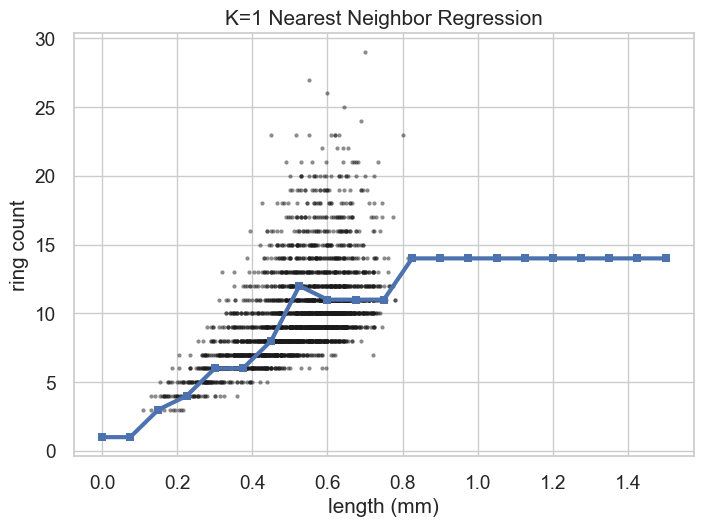

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.5)
plt.plot(x_grid_G, yhat_k1nn_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('K=1 Nearest Neighbor Regression');

#### Retry with 5 nearest neighbors

In [ ]:
k5nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=5, algorithm='brute', metric='euclidean')

In [ ]:
# Fit the model
k5nn_regr.fit(xlength_N1, y_N1);

In [ ]:
# Make predictions on the same grid of x input values
yhat_k5nn_G1 = k5nn_regr.predict(x_grid_G1)

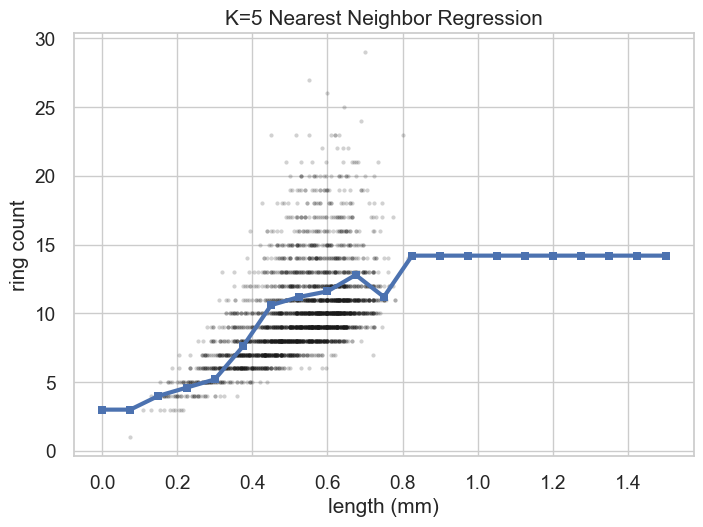

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.2)
plt.plot(x_grid_G1, yhat_k5nn_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('K=5 Nearest Neighbor Regression');

### Retry with 100 nearest neighbors

In [ ]:
k100nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=100, algorithm='brute', metric='euclidean')

In [ ]:
# Fit the model
k100nn_regr.fit(xlength_N1, y_N1);

# Make predictions on the same grid of x input values
yhat_k100_G1 = k100nn_regr.predict(x_grid_G1)

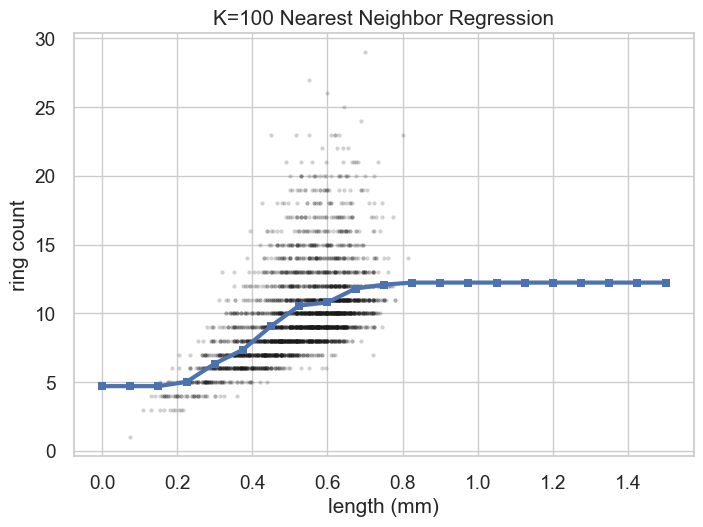

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.2)
plt.plot(x_grid_G1, yhat_k100_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('K=100 Nearest Neighbor Regression');

# Exercises for Part 3

### Discussion Question 3(i): What happens when you call `fit` for a k-NN regressor? 

What (if anything) gets estimated or computed?
What (if anything) gets updated as an attribute of the regressor object?

### Discussion Question 3(ii): k-NN should have a piecewise constant predictions.... why do the plots above look different?

*Hint:* Try a finer grid

### Discussion Question 3(iii): Does the predicted function look smoother or more jagged as K increases? Why does this make sense given how this classifier works?

*Hint*: What should happen in the limit as K -> N?

### Exercise 3a (code): Make a plot of the mean squared error on the *training* set as a function of the number of neighbors

### Exercise 3b (code): Repeat part 3 using *all* available features (not just length). Does your performance improve?

# Challenge Yourself

### Exercise 3c (code): Can you write a function to reproduce what happens when you call `predict()` with kNN?